<a href="https://colab.research.google.com/github/cytrus2012/bachelorthesis/blob/main/reinforcement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best trajectory found:
0 -> 5 -> 8 -> 3 -> 7 -> 9 -> 6 -> 1 -> 4 -> 2 -> 0
Total distance traveled: 10442.70


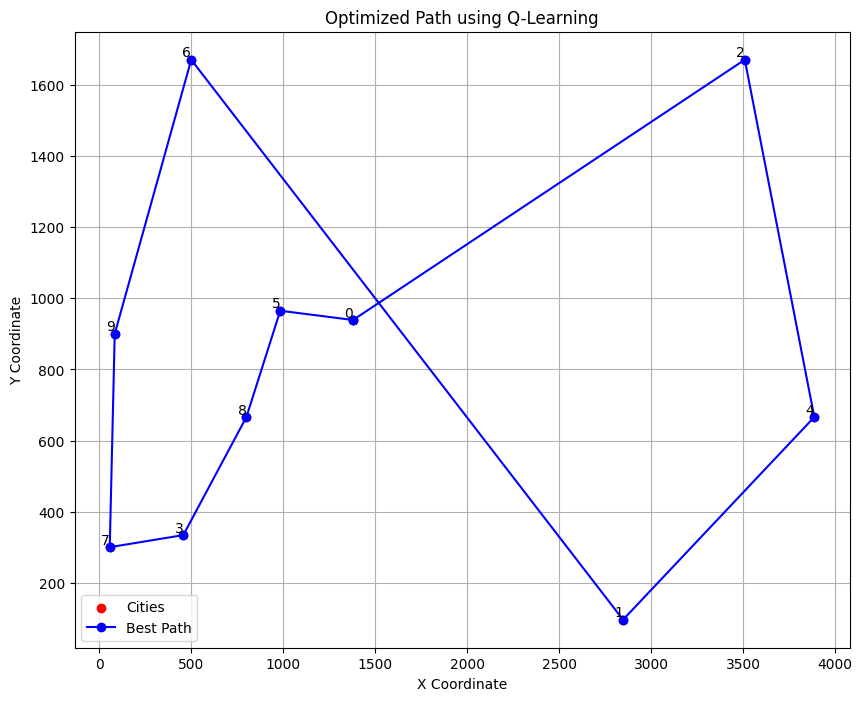

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Example coordinates for cities
locations = [
    (1380, 939), (2848, 96), (3510, 1671), (457, 334),
    (3888, 666), (984, 965), (500, 1671), (57, 300),
    (800, 666), (84, 900)
]

# Calculate the distance matrix using Euclidean distance
n_dest = len(locations)
dist_mat = np.zeros((n_dest, n_dest))
for i, (x1, y1) in enumerate(locations):
    for j, (x2, y2) in enumerate(locations):
        dist_mat[i, j] = np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

# Q-learning update function
def update_q(q, dist_mat, state, action, alpha=0.012, gamma=0.4):
    """
    Update the Q-value for the given state and action using the Bellman equation.
    """
    immed_reward = 1.0 / dist_mat[state, action]  # Immediate reward (inverse of distance)
    delayed_reward = q[action, :].max()          # Future reward
    q[state, action] += alpha * (immed_reward + gamma * delayed_reward - q[state, action])
    return q

# Training the Q-learning model
q = np.zeros((n_dest, n_dest))  # Initialize Q-matrix with zeros
epsilon = 1.0  # Exploration parameter
n_train = 2000  # Number of training iterations

for i in range(n_train):
    traj = [0]  # Start at the warehouse (assumed to be the first location)
    state = 0
    possible_actions = [dest for dest in range(n_dest) if dest not in traj]

    while possible_actions:  # Continue until all destinations are visited
        # Decide the next action
        if random.random() < epsilon:  # Explore: choose a random action
            action = random.choice(possible_actions)
        else:  # Exploit: choose the best-known action from Q-matrix
            best_action_index = q[state, possible_actions].argmax()
            action = possible_actions[best_action_index]

        # Update Q-matrix
        q = update_q(q, dist_mat, state, action)
        traj.append(action)
        state = traj[-1]
        possible_actions = [dest for dest in range(n_dest) if dest not in traj]

    # Final trip: return to the warehouse
    action = 0  # Return to the start point
    q = update_q(q, dist_mat, state, action)
    traj.append(action)

    # Decrease epsilon over time to favor exploitation over exploration
    epsilon = 1.0 - i * 1 / n_train

# Running the model to find the best trajectory
traj = [0]  # Start at the warehouse
state = 0
distance_travel = 0.0
possible_actions = [dest for dest in range(n_dest) if dest not in traj]

while possible_actions:  # Continue until all destinations are visited
    best_action_index = q[state, possible_actions].argmax()
    action = possible_actions[best_action_index]
    distance_travel += dist_mat[state, action]
    traj.append(action)
    state = traj[-1]
    possible_actions = [dest for dest in range(n_dest) if dest not in traj]

# Final trip: return to the warehouse
action = 0
distance_travel += dist_mat[state, action]
traj.append(action)

# Print results
print('Best trajectory found:')
print(' -> '.join([str(b) for b in traj]))
print(f'Total distance traveled: {distance_travel:.2f}')

# Plotting the trajectory
# Extract coordinates for the trajectory
best_path_coordinates = [locations[i] for i in traj]
x, y = zip(*best_path_coordinates)

# Plot the points and trajectory
plt.figure(figsize=(10, 8))
plt.scatter(*zip(*locations), c='red', label='Cities')
for i, coord in enumerate(locations):
    plt.text(coord[0], coord[1], str(i), fontsize=10, ha='right', va='bottom')

plt.plot(x, y, linestyle='-', marker='o', color='blue', label='Best Path')
plt.title("Optimized Path using Q-Learning")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.grid()
plt.show()